In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Задача регрессии

## Подготовка данных

In [3]:
df_r = pd.read_csv('../data/regression/avocado_preprocessed.csv')
df_r.drop(columns='Unnamed: 0', inplace=True)
# Выделяем матрицу признаков и вектор целевый значений из датасета
X = df_r.drop(['y', 'date'], axis=1)
y = df_r['y']
X

total_volume     4046       4225    4770  total_bags  small_bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       large_bags  xlarge_bags  year  month  ...  region_SouthCentral  \
0           93.25          0.0  2015     12  ...                    0   
1           97.49          0.0  2015     12  ...                    0   
2          103.14          0.0  2015     12  ...                    0   
3          133.76          0.0  2015     12  ...                    0   
4          197.69          0.0  2015     11  ...                    0   
...           ...          ...   ...    ...  ...                  ...   
18244      431.85          0.0  2018      2  ...                    0   
18245      324.80          0.0  2018      1  ...                    0   
18246       42.31          0.0  2018      1  ...                    0   
18247       50.00          0.0  2018      1  ...                    0   
18248       26.01          0.0  2018      1  ...                    0   

       region_Southeast  region_Spokane  region_StLouis  region_Syracuse  \
0                     0               0               0                0   
1                     0               0               0                0   
2                     0               0               0                0   
3                     0               0               0                0   
4                     0               0               0                0   
...                 ...             ...             ...              ...   
18244                 0               0               0                0   
18245                 0               0               0                0   
18246                 0               0               0                0   
18247                 0               0               0                0   
18248                 0               0               0                0   

       region_Tampa  region_TotalUS  region_West  region_WestTexNewMexico  \
0                 0               0            0                        0   
1                 0               0            0                        0   
2                 0               0            0                        0   
3                 0               0            0                        0   
4                 0               0            0                        0   
...             ...             ...          ...                      ...   
18244             0               0            0                        1   
18245             0               0            0                        1   
18246             0               0            0                        1   
18247             0               0            0                        1   
18248             0               0            0                        1   

       type_organic  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
18244             1  
18245             1  
18246             1  
18247             1  
18248             1  

[18249 rows x 65 columns]

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Преобразуем числовые признаки путём их скалирования
sc.fit(X.iloc[:,:7])
X.iloc[:,:7] = pd.DataFrame(sc.transform(X.iloc[:,:7]))
X

total_volume      4046      4225      4770  total_bags  small_bags  \
0         -0.227716 -0.230816 -0.199902 -0.212091   -0.234170   -0.232647   
1         -0.230427 -0.231103 -0.208054 -0.211997   -0.233350   -0.231568   
2         -0.212085 -0.231007 -0.154478 -0.211325   -0.234730   -0.233399   
3         -0.223444 -0.230741 -0.185350 -0.211864   -0.237096   -0.236568   
4         -0.231538 -0.230891 -0.208719 -0.211834   -0.236718   -0.236154   
...             ...       ...       ...       ...         ...         ...   
18244     -0.241373 -0.230017 -0.243857 -0.212540   -0.229301   -0.226665   
18245     -0.242296 -0.230693 -0.242277 -0.212540   -0.233594   -0.232196   
18246     -0.242331 -0.230693 -0.243090 -0.205766   -0.233463   -0.231644   
18247     -0.241625 -0.230428 -0.242651 -0.205774   -0.231866   -0.229543   
18248     -0.241253 -0.229347 -0.243170 -0.210450   -0.230807   -0.228111   

       large_bags  xlarge_bags  year  month  ...  region_SouthCentral  \
0       -0.222352          0.0  2015     12  ...                    0   
1       -0.222335          0.0  2015     12  ...                    0   
2       -0.222311          0.0  2015     12  ...                    0   
3       -0.222186          0.0  2015     12  ...                    0   
4       -0.221924          0.0  2015     11  ...                    0   
...           ...          ...   ...    ...  ...                  ...   
18244   -0.220964          0.0  2018      2  ...                    0   
18245   -0.221403          0.0  2018      1  ...                    0   
18246   -0.222561          0.0  2018      1  ...                    0   
18247   -0.222529          0.0  2018      1  ...                    0   
18248   -0.222628          0.0  2018      1  ...                    0   

       region_Southeast  region_Spokane  region_StLouis  region_Syracuse  \
0                     0               0               0                0   
1                     0               0               0                0   
2                     0               0               0                0   
3                     0               0               0                0   
4                     0               0               0                0   
...                 ...             ...             ...              ...   
18244                 0               0               0                0   
18245                 0               0               0                0   
18246                 0               0               0                0   
18247                 0               0               0                0   
18248                 0               0               0                0   

       region_Tampa  region_TotalUS  region_West  region_WestTexNewMexico  \
0                 0               0            0                        0   
1                 0               0            0                        0   
2                 0               0            0                        0   
3                 0               0            0                        0   
4                 0               0            0                        0   
...             ...             ...          ...                      ...   
18244             0               0            0                        1   
18245             0               0            0                        1   
18246             0               0            0                        1   
18247             0               0            0                        1   
18248             0               0            0                        1   

       type_organic  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
18244             1  
18245             1  
18246             1  
18247             1  
18248             1  

[18249 rows x 65 columns]

In [5]:
from sklearn.model_selection import train_test_split
test_size=0.30
train_inx  = round(len(X) * (1 - test_size))
# Разделяем данные на обучение и тест в соотношении 70%\30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
# Если пробовать разбивать с сохранением по дате, то результаты будут заметно хуже
# X_train, X_test, y_train, y_test = X[:train_inx], X[train_inx:], y[:train_inx], y[train_inx:]

## Построение композиционных моделей

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def root_mean_square_error(y_true, y_test_pred):
    return np.sqrt(mean_squared_error(y_true, y_test_pred))

def print_metrics(y_true, y_test_pred):
    print(f'R^2 {r2_score(y_true, y_test_pred)}')
    print(f'MSE {mean_squared_error(y_true, y_test_pred)}')
    print(f'RMSE {root_mean_square_error(y_true, y_test_pred)}')
    print(f'MAE {mean_absolute_error(y_true, y_test_pred)}')
    
    
def plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, model_name):
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.xlabel(f'Предсказание модели "{model_name}"')
    plt.ylabel('Истинные значения')
    plt.xlim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    plt.ylim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    plt.scatter(y_train_pred, y_train, alpha=0.5, color = 'red')
    plt.scatter(y_test_pred, y_test, alpha=0.5, color = 'blue')
    plt.title(model_name)

In [15]:
models_y_test_pred = {
    'bagging' : [],
    'bagging__lr' : [],
    'bagging__tree' : [],
    'bagging__rf' : [],
    'bagging__lasso' : [],
    'bagging__ridge' : [],
    'bagging__en' : [],
    'stacking_1layer__1' : [],
    'stacking_1layer__2' : [],
    'stacking_2layer__1' : [],
    'stacking_2layer__2' : [],
    'boosting__adaboost' : [],
    'boosting__adaboost__lr' : [],
    'boosting__adaboost__tree' : [],
    'boosting__adaboost__lasso' : [],
    'boosting__adaboost__ridge' : [],
    'boosting__adaboost__en' : [],
    'boosting__gradboost_sk' : [],
    'boosting__gradboost_xg' : []
}

### Бэггинг (Bagging)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor

In [16]:
from sklearn.ensemble import BaggingRegressor
regressor = BaggingRegressor()
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['bagging'] = y_test_pred.copy()

print(print_metrics(y_test, y_test_pred))

R^2 0.8902277106138036
MSE 0.01755908182648402
RMSE 0.13251068570679128
MAE 0.09315159817351598
None


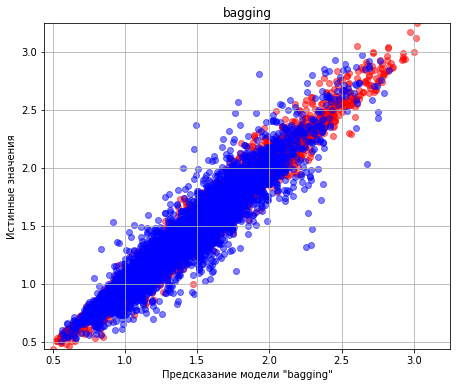

In [17]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'bagging' );

#### Линейная регрессия (Linear regression)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = BaggingRegressor(LinearRegression())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['bagging__lr'] = y_test_pred.copy()

# В сравнении с моделью без бэггинга — качество особо не изменилось
print(print_metrics(y_test, y_test_pred))

R^2 0.5845686484572908
MSE 0.0664520448267389
RMSE 0.2577829413028312
MAE 0.19465429290181335
None


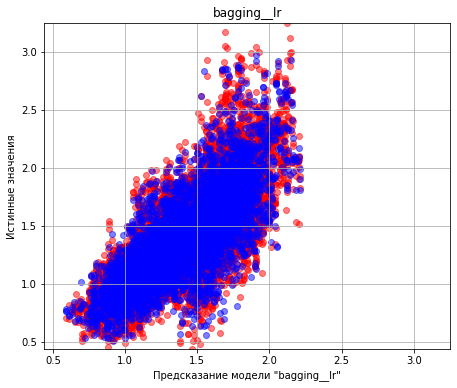

In [19]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'bagging__lr' );

#### Регрессия дерева решений (Decision Tree Regression)

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor = BaggingRegressor(DecisionTreeRegressor())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['bagging__tree'] = y_test_pred.copy()

# В сравнении с моделью без бэггинга — качество несколько
# улучшилось, так как полнота нулевого класса увеличилась
print(print_metrics(y_test, y_test_pred))

R^2 0.8915333670441848
MSE 0.017350230136986302
RMSE 0.13172027230835162
MAE 0.09328036529680366
None


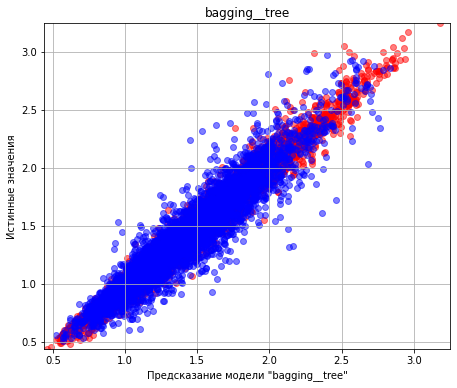

In [21]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'bagging__tree' );

#### Регрессор случайный лес (Random Forest Regressor)

In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['bagging__rf'] = y_test_pred.copy()

# Вывод полностью аналогичен с предыдущим, только можно отметить, что случайный
# лес увеличивает полноту нулевого класса ещё больше, чем просто бэггинг деревьев
print(print_metrics(y_test, y_test_pred))

R^2 0.9035355463916829
MSE 0.01543037176073059
RMSE 0.12421904749566626
MAE 0.08745265753424657
None


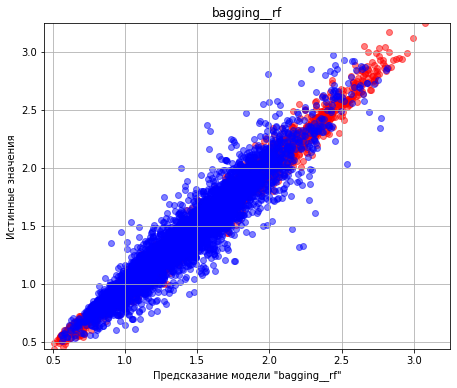

In [23]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'bagging__rf' );

#### LASSO

In [24]:
from sklearn.linear_model import Lasso
regressor = BaggingRegressor(Lasso())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['bagging__lasso'] = y_test_pred.copy()

# В сравнении с моделью без бэггинга — качество особо не изменилось
print(print_metrics(y_test, y_test_pred))

R^2 0.011937242472020548
MSE 0.15804967634497458
RMSE 0.3975546205805871
MAE 0.31990595592577903
None


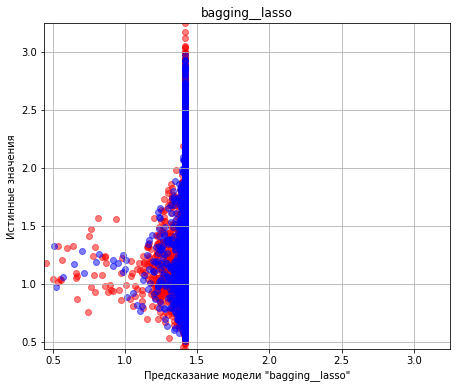

In [25]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'bagging__lasso' );

#### Гребневая регрессия (Ridge regression)

In [26]:
from sklearn.linear_model import Ridge
regressor = BaggingRegressor(Ridge())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['bagging__ridge'] = y_test_pred.copy()

# В сравнении с моделью без бэггинга — качество особо не изменилось
print(print_metrics(y_test, y_test_pred))

R^2 0.5840836448498179
MSE 0.06652962559031207
RMSE 0.25793337432428565
MAE 0.19480509337380794
None


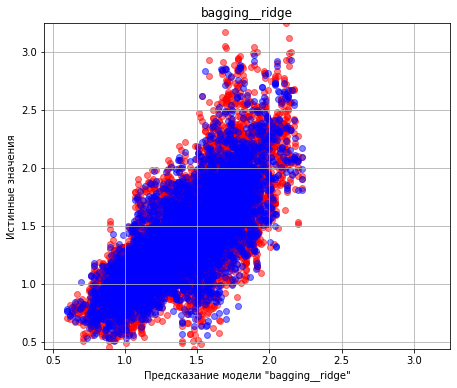

In [27]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'bagging__ridge' );

#### Elastic Net регрессия (Elastic Net regression)

In [28]:
from sklearn.linear_model import ElasticNet
regressor = BaggingRegressor(ElasticNet())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['bagging__en'] = y_test_pred.copy()

# В сравнении с моделью без бэггинга — качество особо не изменилось
print(print_metrics(y_test, y_test_pred))

R^2 0.012093869299184767
MSE 0.15802462245122983
RMSE 0.3975231093297971
MAE 0.3197774250911367
None


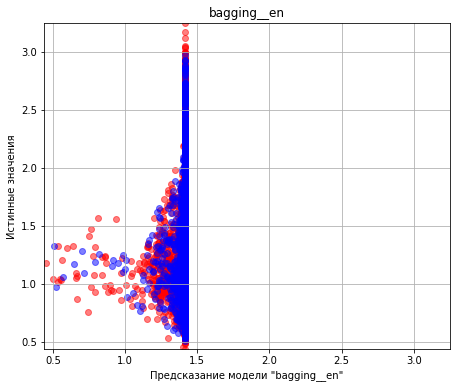

In [29]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'bagging__en' );

### Стекинг (Stacking)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html#sklearn.ensemble.StackingRegressor

In [12]:
from sklearn.ensemble import StackingRegressor

#### Однослойный стекинг

In [30]:
%%time
base_learners = [
                 ('rf_1', DecisionTreeRegressor()),
                 ('lr_1', Ridge())
                ]

regressor = StackingRegressor(estimators=base_learners, final_estimator=RandomForestRegressor())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['stacking_1layer__1'] = y_test_pred.copy()

print(print_metrics(y_test, y_test_pred))

R^2 0.7791169089136305
MSE 0.03533227094159519
RMSE 0.18796880310731137
MAE 0.13481998121330727
None
Wall time: 3.33 s


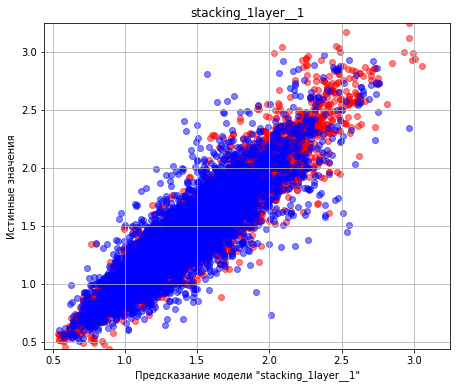

In [31]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'stacking_1layer__1' );

In [32]:
%%time
base_learners = [
                 ('rf_1', RandomForestRegressor()),
                 ('lr_1', LinearRegression()),
                 ('lasso_1', Lasso())
                ]

regressor = StackingRegressor(estimators=base_learners, final_estimator=RandomForestRegressor())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['stacking_1layer__2'] = y_test_pred.copy()

print(print_metrics(y_test, y_test_pred))

R^2 0.8924161818924276
MSE 0.01720901582648402
RMSE 0.13118313849913799
MAE 0.09353083105022832
None
Wall time: 1min


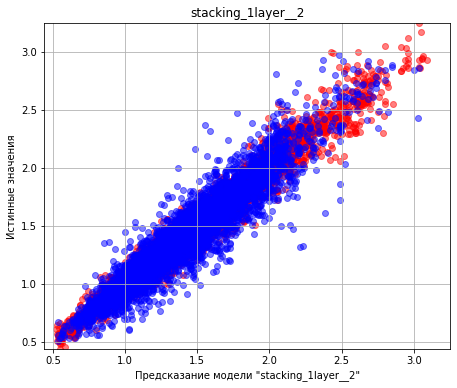

In [33]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'stacking_1layer__2' );

#### Двухслойный стекинг

In [34]:
%%time
layer_one_estimators = [
                        ('rf_1', RandomForestRegressor()),
                        ('lr_1', LinearRegression())
                       ]
layer_two_estimators = [
                        ('tree_2', DecisionTreeRegressor()),
                        ('rf_2', RandomForestRegressor()),
                       ]
layer_two = StackingRegressor(estimators=layer_two_estimators, final_estimator=RandomForestRegressor())

regressor = StackingRegressor(estimators=layer_one_estimators, final_estimator=layer_two)
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['stacking_2layer__1'] = y_test_pred.copy()

print(print_metrics(y_test, y_test_pred))

R^2 0.8561082104303057
MSE 0.023016807988074962
RMSE 0.15171291305645332
MAE 0.11220393540624772
None
Wall time: 1min 8s


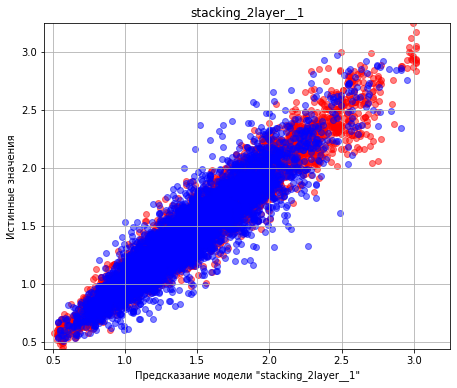

In [35]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'stacking_2layer__1' );

In [36]:
%%time
# Добавим к каждому слою по алгоритму регрессора lasso
layer_one_estimators = [
                        ('rf_1', RandomForestRegressor()),
                        ('knn_1', LinearRegression()),
                        ('lasso_1', Lasso())
                       ]
layer_two_estimators = [
                        ('tree_2', DecisionTreeRegressor()),
                        ('rf_2', RandomForestRegressor()),
                        ('lasso_2', Lasso())

                       ]
layer_two = StackingRegressor(estimators=layer_two_estimators, final_estimator=RandomForestRegressor())

regressor = StackingRegressor(estimators=layer_one_estimators, final_estimator=layer_two)
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['stacking_2layer__2'] = y_test_pred.copy()

print(print_metrics(y_test, y_test_pred))

R^2 0.8685699391817105
MSE 0.021023440480948136
RMSE 0.14499462224837215
MAE 0.10590646940639269
None
Wall time: 1min 11s


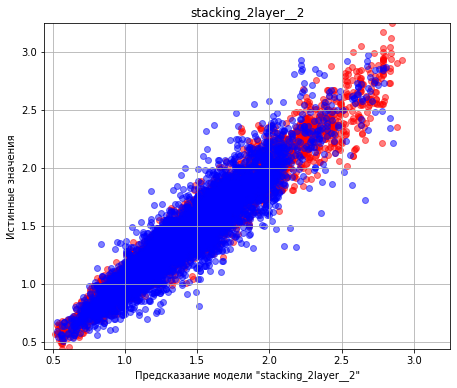

In [37]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'stacking_2layer__2' );

### Бустинг (Boosting)

#### Адаптивный бустинг (Adaptive Boosting)

In [38]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['boosting__adaboost'] = y_test_pred.copy()

print(print_metrics(y_test, y_test_pred))

R^2 0.5527788887843441
MSE 0.07153710768242647
RMSE 0.26746421757391486
MAE 0.2168612950305599
None


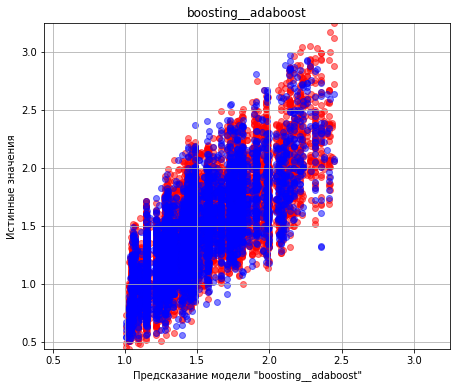

In [39]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__adaboost' );

##### Регрессия дерева решений (Decision Tree Regression)

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor = AdaBoostRegressor(DecisionTreeRegressor())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['boosting__adaboost__tree'] = y_test_pred.copy()

# В сравнении с моделью без бустинга — качество особо не изменилось
print(print_metrics(y_test, y_test_pred))

R^2 0.912746785713152
MSE 0.013956949771689497
RMSE 0.1181395351763731
MAE 0.07956347031963469
None


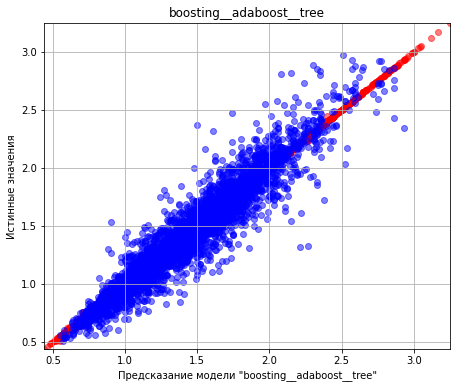

In [41]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__adaboost__tree' );

##### LASSO

In [42]:
regressor = AdaBoostRegressor(Lasso())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['boosting__adaboost__lasso'] = y_test_pred.copy()

# В сравнении с моделью без бустинга — качество особо не изменилось,
# раньше алгоритм относил более 85% объектов к первому классу,
# теперь относит более 85% ко второму
print(print_metrics(y_test, y_test_pred))

R^2 -0.019865356237841025
MSE 0.16313679292206143
RMSE 0.4039019595422402
MAE 0.32852556627146856
None


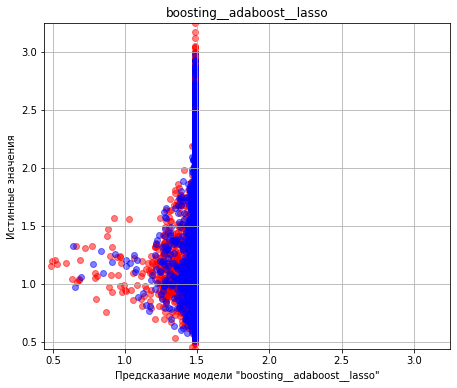

In [43]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__adaboost__lasso' );

##### Гребневая регрессия (Ridge regression)

In [97]:
from sklearn.linear_model import ElasticNet
regressor = AdaBoostRegressor(ElasticNet())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['boosting__adaboost__ridge'] = y_test_pred.copy()

# В сравнении с моделью без бустинга — качество несколько улучшилось
print(print_metrics(y_test, y_test_pred))

R^2 -0.017313567058033774
MSE 0.1627286109003261
RMSE 0.4033963446789349
MAE 0.32789056857725635
None


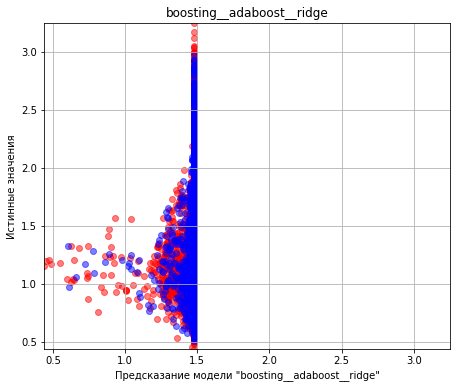

In [98]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__adaboost__ridge' );

##### Elastic Net регрессия (Elastic Net regression)

In [44]:
from sklearn.linear_model import ElasticNet
regressor = AdaBoostRegressor(ElasticNet())
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['boosting__adaboost__en'] = y_test_pred.copy()

# В сравнении с моделью без бустинга — качество несколько улучшилось
print(print_metrics(y_test, y_test_pred))

R^2 -0.012112573593045628
MSE 0.1618966644196488
RMSE 0.4023638458157602
MAE 0.32678191449604577
None


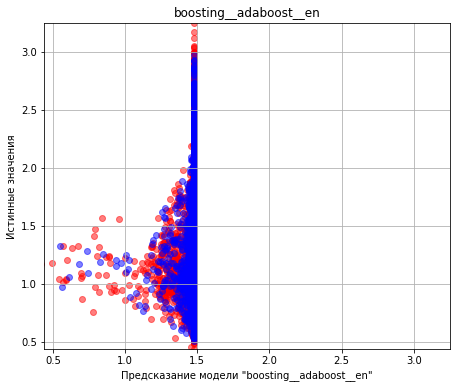

In [45]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__adaboost__en' );

#### Градиентный бустинг из sklearn (Gradient Boosting)

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['boosting__gradboost_sk'] = y_test_pred.copy()

print(print_metrics(y_test, y_test_pred))

R^2 0.7403328078747144
MSE 0.041536142679325254
RMSE 0.20380417728625008
MAE 0.1541922515017558
None


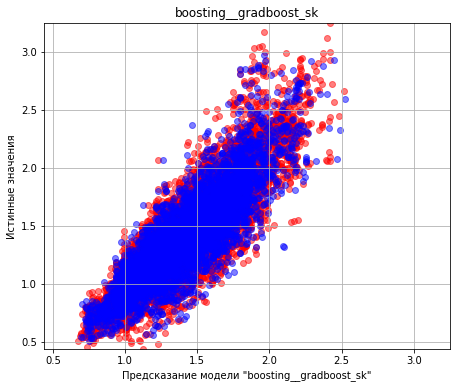

In [47]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__gradboost_sk' );

#### Градиентный бустинг из xgboost (Gradient Boosting)

In [48]:
from xgboost import XGBRegressor
regressor = XGBRegressor(use_label_encoder=False, verbosity=0)
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
models_y_test_pred['boosting__gradboost_xg'] = y_test_pred.copy()

print(print_metrics(y_test, y_test_pred))

R^2 0.9025924384921821
MSE 0.015581230496310734
RMSE 0.12482479920396722
MAE 0.08980124616862432
None


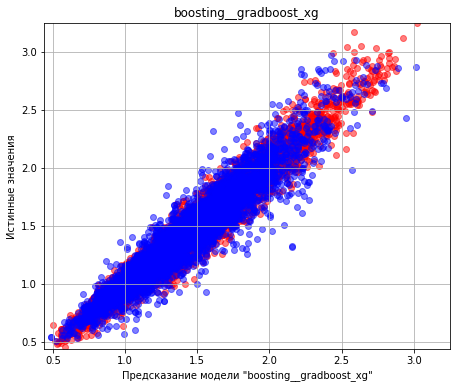

In [49]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__gradboost_xg' );

## Подбор параметров

In [52]:
from sklearn.model_selection import RandomizedSearchCV

### Бэггинг (Bagging)

#### Линейная регрессия (Linear regression)

In [44]:
regressor = BaggingRegressor(LinearRegression())
regressor.get_params()

{'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__n_jobs': None,
 'base_estimator__normalize': False,
 'base_estimator__positive': False,
 'base_estimator': LinearRegression(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__normalize': [False, True]

}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.51254139 0.58885834 0.58852117 0.58898535 0.58886346 0.52280372
 0.51999888 0.51344472        nan 0.51051607]
  warnings.warn(


Наилучший оценщик
R^2 0.5911756550613139
MSE 0.06510819184829801
RMSE 0.2551630691308952
MAE 0.19369708875996358
None
Wall time: 2min 2s


Наилучшие параметры
{'n_estimators': 190, 'max_samples': 0.6000000000000001, 'bootstrap_features': False, 'bootstrap': False, 'base_estimator__normalize': True}


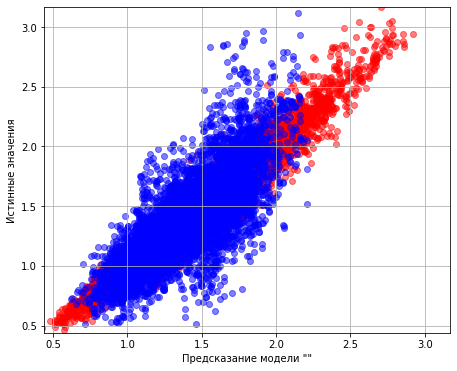

In [46]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [47]:
y_test_pred = models_y_test_pred['bagging__lr']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.5909143898704352
MSE 0.06514980019276576
RMSE 0.25524458895883717
MAE 0.1938648789997109
None


#### Регрессия дерева решений (Decision Tree Regression)

In [48]:
regressor = BaggingRegressor(DecisionTreeRegressor())
regressor.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__max_depth' : list(range(0, 25)),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.898314270094199
MSE 0.01619417750656222
RMSE 0.1272563456435954
MAE 0.08835132031749526
None
Wall time: 1min 55s


Наилучшие параметры
{'n_estimators': 150, 'max_samples': 0.8, 'bootstrap_features': False, 'bootstrap': False, 'base_estimator__max_depth': 23}


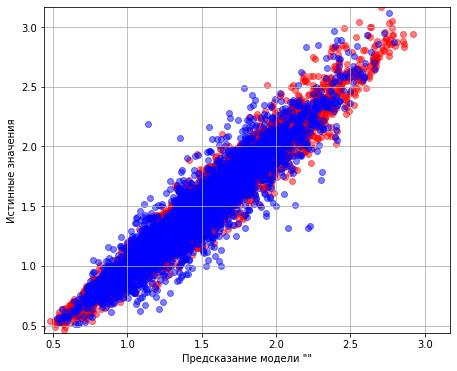

In [50]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [51]:
y_test_pred = models_y_test_pred['bagging__tree']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.8806786651652128
MSE 0.019002773333333334
RMSE 0.1378505470911644
MAE 0.09600547945205479
None


#### Регрессор случайный лес (Random Forest Regressor)

In [52]:
regressor = BaggingRegressor(RandomForestRegressor())
regressor.get_params()

{'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestRegressor(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__max_depth' : list(range(2, 25)),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.8917200813722862
MSE 0.01724434907708005
RMSE 0.13131774090761708
MAE 0.09435502191429132
None
Wall time: 1h 11min 27s


Наилучшие параметры
{'n_estimators': 150, 'max_samples': 0.8, 'bootstrap_features': False, 'bootstrap': False, 'base_estimator__max_depth': 17}


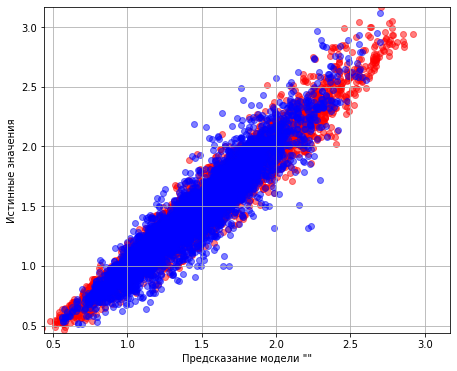

In [54]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [55]:
y_test_pred = models_y_test_pred['bagging__rf']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.8997253392581751
MSE 0.01596945468127854
RMSE 0.12637030775177585
MAE 0.089043799086758
None


#### LASSO

In [56]:
regressor = BaggingRegressor(Lasso())
regressor.get_params()

{'base_estimator__alpha': 1.0,
 'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__max_iter': 1000,
 'base_estimator__normalize': False,
 'base_estimator__positive': False,
 'base_estimator__precompute': False,
 'base_estimator__random_state': None,
 'base_estimator__selection': 'cyclic',
 'base_estimator__tol': 0.0001,
 'base_estimator__warm_start': False,
 'base_estimator': Lasso(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [57]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__alpha': np.arange(0, 1, 0.01),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.01101445 0.01275637 0.01267829 0.27790002 0.2408282  0.01129958
 0.01255012 0.01129492        nan        nan]
  warnings.warn(


Наилучший оценщик
R^2 0.27695981606151887
MSE 0.1151493045673578
RMSE 0.33933656532616374
MAE 0.26809556125371864
None
Wall time: 55.7 s


Наилучшие параметры
{'n_estimators': 130, 'max_samples': 0.2, 'bootstrap_features': False, 'bootstrap': True, 'base_estimator__alpha': 0.07}


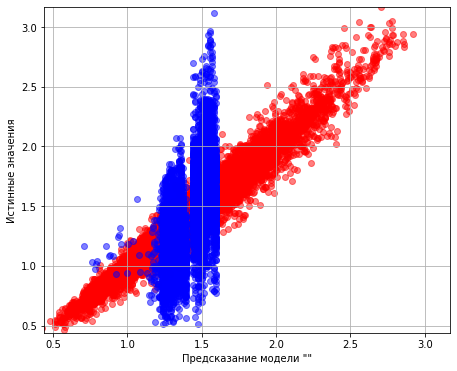

In [58]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [59]:
y_test_pred = models_y_test_pred['bagging__lasso']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.01350877788589988
MSE 0.15710576080223293
RMSE 0.3963656907481183
MAE 0.3202826287166744
None


#### Гребневая регрессия (Ridge regression)

In [60]:
regressor = BaggingRegressor(Ridge())
regressor.get_params()

{'base_estimator__alpha': 1.0,
 'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__max_iter': None,
 'base_estimator__normalize': False,
 'base_estimator__random_state': None,
 'base_estimator__solver': 'auto',
 'base_estimator__tol': 0.001,
 'base_estimator': Ridge(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [61]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__alpha': np.arange(0, 400, 1),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.5820581668302813
MSE 0.06656021685676392
RMSE 0.2579926682228856
MAE 0.1964015693911671
None
Wall time: 45 s


Наилучшие параметры
{'n_estimators': 180, 'max_samples': 0.8, 'bootstrap_features': False, 'bootstrap': False, 'base_estimator__alpha': 49}


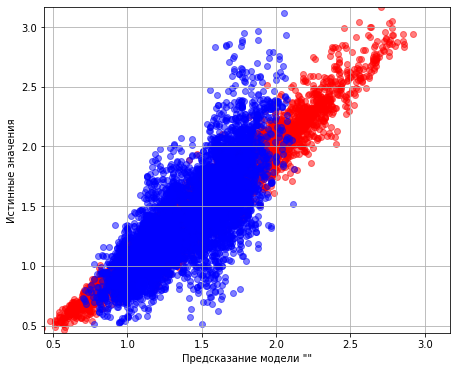

In [62]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [63]:
y_test_pred = models_y_test_pred['bagging__ridge']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.5902989937497083
MSE 0.06524780641276472
RMSE 0.25543650172354915
MAE 0.193907879863627
None


#### Elastic Net регрессия (Elastic Net regression)


In [64]:
regressor = BaggingRegressor(ElasticNet())
regressor.get_params()

{'base_estimator__alpha': 1.0,
 'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__l1_ratio': 0.5,
 'base_estimator__max_iter': 1000,
 'base_estimator__normalize': False,
 'base_estimator__positive': False,
 'base_estimator__precompute': False,
 'base_estimator__random_state': None,
 'base_estimator__selection': 'cyclic',
 'base_estimator__tol': 0.0001,
 'base_estimator__warm_start': False,
 'base_estimator': ElasticNet(),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
%%time
parameters = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': range(0, 200, 10),
    'max_samples' : np.arange(0.2, 1, 0.2),
    'base_estimator__alpha': np.arange(0, 1, 0.1)
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.9111515191786476
MSE 0.014212127246542618
RMSE 0.11921462681459276
MAE 0.08480730356778184
None
Wall time: 24.6 s


Наилучшие параметры
{'n_estimators': 170, 'max_samples': 0.6000000000000001, 'bootstrap_features': True, 'bootstrap': True, 'base_estimator__alpha': 0.30000000000000004}


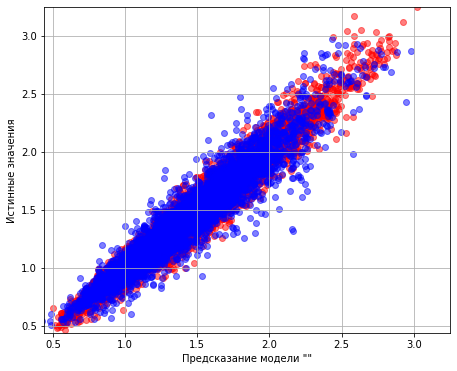

In [54]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [55]:
y_test_pred = models_y_test_pred['bagging__en']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.012093869299184767
MSE 0.15802462245122983
RMSE 0.3975231093297971
MAE 0.3197774250911367
None


### Стекинг (Stacking)

#### Однослойный стекинг

In [56]:
base_learners = [
                 ('rf_1', RandomForestRegressor()),
                 ('lr_1', LinearRegression())
                ]

regressor = StackingRegressor(estimators=base_learners, final_estimator=RandomForestRegressor())
regressor.get_params()

{'cv': None,
 'estimators': [('rf_1', RandomForestRegressor()),
  ('lr_1', LinearRegression())],
 'final_estimator__bootstrap': True,
 'final_estimator__ccp_alpha': 0.0,
 'final_estimator__criterion': 'mse',
 'final_estimator__max_depth': None,
 'final_estimator__max_features': 'auto',
 'final_estimator__max_leaf_nodes': None,
 'final_estimator__max_samples': None,
 'final_estimator__min_impurity_decrease': 0.0,
 'final_estimator__min_impurity_split': None,
 'final_estimator__min_samples_leaf': 1,
 'final_estimator__min_samples_split': 2,
 'final_estimator__min_weight_fraction_leaf': 0.0,
 'final_estimator__n_estimators': 100,
 'final_estimator__n_jobs': None,
 'final_estimator__oob_score': False,
 'final_estimator__random_state': None,
 'final_estimator__verbose': 0,
 'final_estimator__warm_start': False,
 'final_estimator': RandomForestRegressor(),
 'n_jobs': None,
 'passthrough': False,
 'verbose': 0,
 'rf_1': RandomForestRegressor(),
 'lr_1': LinearRegression(),
 'rf_1__bootstrap':

In [57]:
%%time
parameters = {
    'rf_1__max_depth' : list(range(2, 25)),
    'final_estimator__max_depth' : list(range(2, 25))
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.9012540254305589
MSE 0.015795321908616027
RMSE 0.12567944107377318
MAE 0.08869079904650148
None
Wall time: 7min 18s


Наилучшие параметры
{'rf_1__max_depth': 23, 'final_estimator__max_depth': 10}


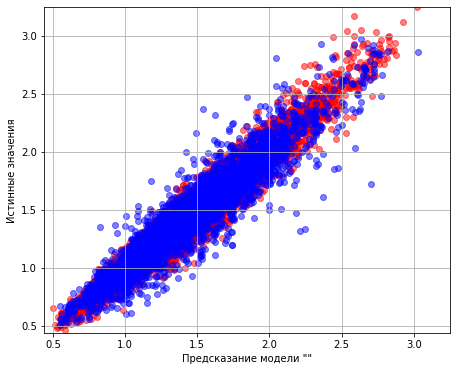

In [58]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [59]:
y_test_pred = models_y_test_pred['stacking_1layer__1']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.7791169089136305
MSE 0.03533227094159519
RMSE 0.18796880310731137
MAE 0.13481998121330727
None


In [60]:
# Добавим к базовым алгоритмам ещё наивный байесовский классификатор и построим новую модель
base_learners = [
                 ('rf_1', RandomForestRegressor()),
                 ('lr_1', LinearRegression()),
                 ('lasso_1', Lasso())
                ]

regressor = StackingRegressor(estimators=base_learners, final_estimator=RandomForestRegressor())
regressor.get_params()

{'cv': None,
 'estimators': [('rf_1', RandomForestRegressor()),
  ('lr_1', LinearRegression()),
  ('lasso_1', Lasso())],
 'final_estimator__bootstrap': True,
 'final_estimator__ccp_alpha': 0.0,
 'final_estimator__criterion': 'mse',
 'final_estimator__max_depth': None,
 'final_estimator__max_features': 'auto',
 'final_estimator__max_leaf_nodes': None,
 'final_estimator__max_samples': None,
 'final_estimator__min_impurity_decrease': 0.0,
 'final_estimator__min_impurity_split': None,
 'final_estimator__min_samples_leaf': 1,
 'final_estimator__min_samples_split': 2,
 'final_estimator__min_weight_fraction_leaf': 0.0,
 'final_estimator__n_estimators': 100,
 'final_estimator__n_jobs': None,
 'final_estimator__oob_score': False,
 'final_estimator__random_state': None,
 'final_estimator__verbose': 0,
 'final_estimator__warm_start': False,
 'final_estimator': RandomForestRegressor(),
 'n_jobs': None,
 'passthrough': False,
 'verbose': 0,
 'rf_1': RandomForestRegressor(),
 'lr_1': LinearRegressio

In [61]:
%%time
parameters = {
    'rf_1__max_depth' : list(range(2, 25)),
    'lasso_1__alpha': np.arange(0, 1, 0.01),
    'final_estimator__max_depth' : list(range(2, 25))
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.9018586028020629
MSE 0.015698614227688177
RMSE 0.12529411090585293
MAE 0.08871921517115909
None
Wall time: 4min 38s


Наилучшие параметры
{'rf_1__max_depth': 19, 'lasso_1__alpha': 0.62, 'final_estimator__max_depth': 4}


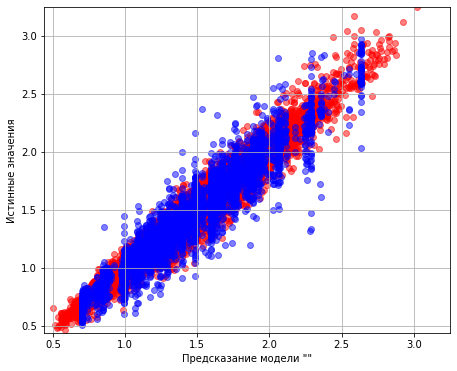

In [62]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [63]:
y_test_pred = models_y_test_pred['stacking_1layer__2']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.8924161818924276
MSE 0.01720901582648402
RMSE 0.13118313849913799
MAE 0.09353083105022832
None


#### Двухслойный стекинг

In [64]:
layer_one_estimators = [
                        ('rf_1', RandomForestRegressor()),
                        ('lr_1', LinearRegression())
                       ]
layer_two_estimators = [
                        ('tree_2', DecisionTreeRegressor()),
                        ('rf_2', RandomForestRegressor()),
                       ]
layer_two = StackingRegressor(estimators=layer_two_estimators, final_estimator=RandomForestRegressor())

regressor = StackingRegressor(estimators=layer_one_estimators, final_estimator=layer_two)
regressor.get_params()

{'cv': None,
 'estimators': [('rf_1', RandomForestRegressor()),
  ('lr_1', LinearRegression())],
 'final_estimator__cv': None,
 'final_estimator__estimators': [('tree_2', DecisionTreeRegressor()),
  ('rf_2', RandomForestRegressor())],
 'final_estimator__final_estimator__bootstrap': True,
 'final_estimator__final_estimator__ccp_alpha': 0.0,
 'final_estimator__final_estimator__criterion': 'mse',
 'final_estimator__final_estimator__max_depth': None,
 'final_estimator__final_estimator__max_features': 'auto',
 'final_estimator__final_estimator__max_leaf_nodes': None,
 'final_estimator__final_estimator__max_samples': None,
 'final_estimator__final_estimator__min_impurity_decrease': 0.0,
 'final_estimator__final_estimator__min_impurity_split': None,
 'final_estimator__final_estimator__min_samples_leaf': 1,
 'final_estimator__final_estimator__min_samples_split': 2,
 'final_estimator__final_estimator__min_weight_fraction_leaf': 0.0,
 'final_estimator__final_estimator__n_estimators': 100,
 'fina

In [65]:
%%time
parameters = {
    'rf_1__max_depth' : list(range(2, 25)),
    'final_estimator__tree_2__max_depth' : list(range(2, 25)),
    'final_estimator__rf_2__max_depth' : list(range(2, 25)),
    'final_estimator__final_estimator__max_depth' : list(range(2, 25)),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.8919412615563718
MSE 0.01728498367855757
RMSE 0.1314723684983182
MAE 0.09385660368903169
None
Wall time: 7min 58s


Наилучшие параметры
{'rf_1__max_depth': 16, 'final_estimator__tree_2__max_depth': 20, 'final_estimator__rf_2__max_depth': 8, 'final_estimator__final_estimator__max_depth': 9}


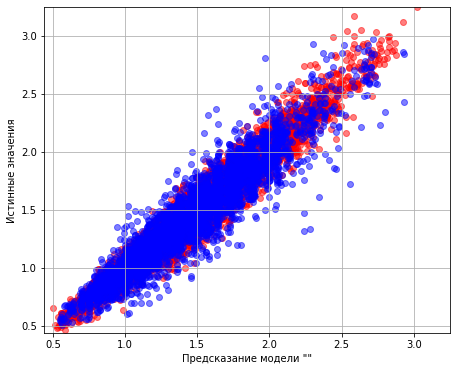

In [66]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [67]:
y_test_pred = models_y_test_pred['stacking_2layer__1']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.8561082104303057
MSE 0.023016807988074962
RMSE 0.15171291305645332
MAE 0.11220393540624772
None


In [68]:
# Добавим к каждому слою по алгоритму наивного баевского классификатора
layer_one_estimators = [
                        ('rf_1', RandomForestRegressor()),
                        ('lr_1', LinearRegression()),
                        ('lasso_1', Lasso())
                       ]
layer_two_estimators = [
                        ('tree_2', DecisionTreeRegressor()),
                        ('rf_2', RandomForestRegressor()),
                        ('lasso_2', Lasso())

                       ]
layer_two = StackingRegressor(estimators=layer_two_estimators, final_estimator=RandomForestRegressor())

regressor = StackingRegressor(estimators=layer_one_estimators, final_estimator=layer_two)
regressor.get_params()

{'cv': None,
 'estimators': [('rf_1', RandomForestRegressor()),
  ('lr_1', LinearRegression()),
  ('lasso_1', Lasso())],
 'final_estimator__cv': None,
 'final_estimator__estimators': [('tree_2', DecisionTreeRegressor()),
  ('rf_2', RandomForestRegressor()),
  ('lasso_2', Lasso())],
 'final_estimator__final_estimator__bootstrap': True,
 'final_estimator__final_estimator__ccp_alpha': 0.0,
 'final_estimator__final_estimator__criterion': 'mse',
 'final_estimator__final_estimator__max_depth': None,
 'final_estimator__final_estimator__max_features': 'auto',
 'final_estimator__final_estimator__max_leaf_nodes': None,
 'final_estimator__final_estimator__max_samples': None,
 'final_estimator__final_estimator__min_impurity_decrease': 0.0,
 'final_estimator__final_estimator__min_impurity_split': None,
 'final_estimator__final_estimator__min_samples_leaf': 1,
 'final_estimator__final_estimator__min_samples_split': 2,
 'final_estimator__final_estimator__min_weight_fraction_leaf': 0.0,
 'final_estima

In [72]:
%%time
parameters = {
    # 'rf_1__max_depth' : list(range(2, 25)),
    'lasso_1__alpha': np.arange(0, 1, 0.01),
    # 'final_estimator__tree_2__max_depth' : list(range(2, 25)),
    # 'final_estimator__rf_2__max_depth' : list(range(2, 25)),
    'final_estimator__lasso_2__alpha': np.arange(0, 1, 0.01),
    'final_estimator__final_estimator__max_depth' : list(range(2, 25)),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.8929145600648984
MSE 0.01712929567889592
RMSE 0.1308789351992746
MAE 0.09413102366967918
None
Wall time: 12min 56s


Наилучшие параметры
{'lasso_1__alpha': 0.14, 'final_estimator__lasso_2__alpha': 0.85, 'final_estimator__final_estimator__max_depth': 7}


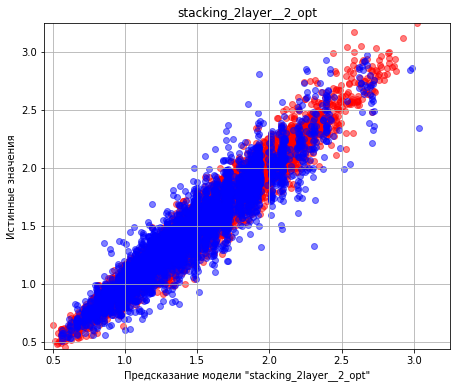

In [73]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'stacking_2layer__2_opt' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [74]:
y_test_pred = models_y_test_pred['stacking_2layer__2']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.8685699391817105
MSE 0.021023440480948136
RMSE 0.14499462224837215
MAE 0.10590646940639269
None


### Бустинг (Boosting)

#### Адаптивный бустинг (Adaptive Boosting)

In [75]:
regressor = AdaBoostRegressor()
regressor.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [76]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.5622784976165816
MSE 0.07001755835228538
RMSE 0.2646083111927616
MAE 0.21368747486395173
None
Wall time: 1min 32s


Наилучшие параметры
{'n_estimators': 40, 'learning_rate': 0.9}


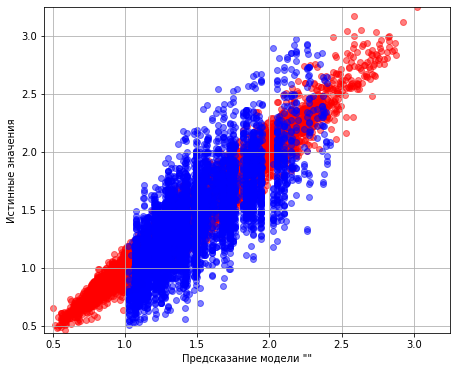

In [77]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [78]:
y_test_pred = models_y_test_pred['boosting__adaboost']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.5527788887843441
MSE 0.07153710768242647
RMSE 0.26746421757391486
MAE 0.2168612950305599
None


##### Линейная регрессия (Linear Regression)

In [79]:
regressor = AdaBoostRegressor(LinearRegression())
regressor.get_params()

{'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__n_jobs': None,
 'base_estimator__normalize': False,
 'base_estimator__positive': False,
 'base_estimator': LinearRegression(),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [80]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.5813120045473437
MSE 0.0669729748102004
RMSE 0.25879137313712836
MAE 0.19747439080573162
None
Wall time: 16.9 s


Наилучшие параметры
{'n_estimators': 10, 'learning_rate': 0.2}


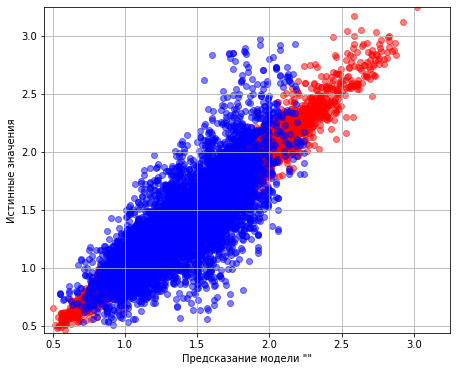

In [81]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, '' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [82]:
y_test_pred = models_y_test_pred['boosting__adaboost__tree']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.912746785713152
MSE 0.013956949771689497
RMSE 0.1181395351763731
MAE 0.07956347031963469
None


##### Регрессия дерева решений (Decision Tree Regression)

In [83]:
regressor = AdaBoostRegressor(DecisionTreeRegressor())
regressor.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [84]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
    'base_estimator__max_depth' : list(range(2, 25)),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.88710127 0.89020915 0.85972938 0.6422236  0.69524886 0.82855898
        nan        nan 0.89367938 0.87693277]
  warnings.warn(


Наилучший оценщик
R^2 0.9173516937340962
MSE 0.013220352610463131
RMSE 0.11497979218307507
MAE 0.07791589590661874
None
Wall time: 2min 7s


Наилучшие параметры
{'n_estimators': 140, 'learning_rate': 0.8500000000000001, 'base_estimator__max_depth': 21}


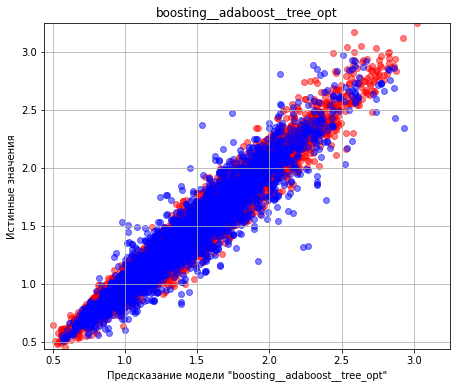

In [85]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__adaboost__tree_opt' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [86]:
y_test_pred = models_y_test_pred['boosting__adaboost__tree']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.912746785713152
MSE 0.013956949771689497
RMSE 0.1181395351763731
MAE 0.07956347031963469
None


##### LASSO

In [87]:
regressor = AdaBoostRegressor(Lasso())
regressor.get_params()

{'base_estimator__alpha': 1.0,
 'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__max_iter': 1000,
 'base_estimator__normalize': False,
 'base_estimator__positive': False,
 'base_estimator__precompute': False,
 'base_estimator__random_state': None,
 'base_estimator__selection': 'cyclic',
 'base_estimator__tol': 0.0001,
 'base_estimator__warm_start': False,
 'base_estimator': Lasso(),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [88]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
    'base_estimator__alpha': np.arange(0, 1, 0.01),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.45387219708744453
MSE 0.08735813776573521
RMSE 0.2955641009421395
MAE 0.23243532871195804
None
Wall time: 18 s


Наилучшие параметры
{'n_estimators': 40, 'learning_rate': 0.65, 'base_estimator__alpha': 0.01}


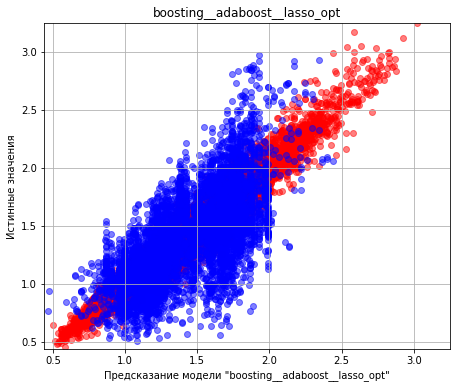

In [89]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__adaboost__lasso_opt' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [90]:
y_test_pred = models_y_test_pred['boosting__adaboost__lasso']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 -0.019865356237841025
MSE 0.16313679292206143
RMSE 0.4039019595422402
MAE 0.32852556627146856
None


##### Гребневая регрессия (Ridge Regression)

In [91]:
regressor = AdaBoostRegressor(Ridge())
regressor.get_params()

{'base_estimator__alpha': 1.0,
 'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__max_iter': None,
 'base_estimator__normalize': False,
 'base_estimator__random_state': None,
 'base_estimator__solver': 'auto',
 'base_estimator__tol': 0.001,
 'base_estimator': Ridge(),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [92]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
    'base_estimator__alpha': np.arange(0, 300, 1),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.54219193 0.5511009  0.55777519 0.5560625  0.57472011 0.55827986
 0.55954236 0.55474119 0.54808161        nan]
  warnings.warn(


Наилучший оценщик
R^2 0.5668661976946296
MSE 0.06928371375893445
RMSE 0.26321799664714124
MAE 0.20290720624910427
None
Wall time: 7.01 s


Наилучшие параметры
{'n_estimators': 50, 'learning_rate': 0.1, 'base_estimator__alpha': 60}


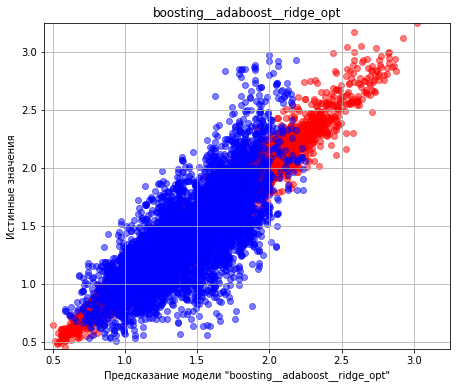

In [93]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__adaboost__ridge_opt' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [99]:
y_test_pred = models_y_test_pred['boosting__adaboost__ridge']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 -0.017313567058033774
MSE 0.1627286109003261
RMSE 0.4033963446789349
MAE 0.32789056857725635
None


##### Elastic Net регрессия (Elastic Net regression)

In [100]:
regressor = AdaBoostRegressor(ElasticNet())
regressor.get_params()

{'base_estimator__alpha': 1.0,
 'base_estimator__copy_X': True,
 'base_estimator__fit_intercept': True,
 'base_estimator__l1_ratio': 0.5,
 'base_estimator__max_iter': 1000,
 'base_estimator__normalize': False,
 'base_estimator__positive': False,
 'base_estimator__precompute': False,
 'base_estimator__random_state': None,
 'base_estimator__selection': 'cyclic',
 'base_estimator__tol': 0.0001,
 'base_estimator__warm_start': False,
 'base_estimator': ElasticNet(),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [105]:
%%time
parameters = {
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
    'base_estimator__alpha': np.arange(0, 1, 0.01),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

d:\&&&\my-projects\python\pycharm\general_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 0.30757577 -0.01019343 -0.02131301 -0.0163894          nan  0.46025665
  0.01315616  0.01400808  0.39421608  0.03182256]
  warnings.warn(


Наилучший оценщик
R^2 0.44034297871118777
MSE 0.08952226000319068
RMSE 0.2992027072123357
MAE 0.23459476518628972
None
Wall time: 27.1 s


Наилучшие параметры
{'n_estimators': 60, 'learning_rate': 0.15000000000000002, 'base_estimator__alpha': 0.02}


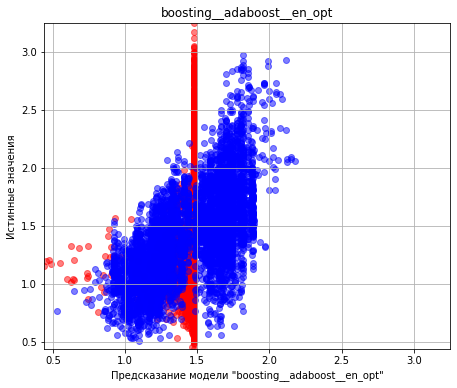

In [106]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'boosting__adaboost__en_opt' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [107]:
y_test_pred = models_y_test_pred['boosting__adaboost__en']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 -0.012112573593045628
MSE 0.1618966644196488
RMSE 0.4023638458157602
MAE 0.32678191449604577
None


#### Градиентный бустинг из sklearn (Gradient Boosting)

In [108]:
regressor = GradientBoostingRegressor()
regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [109]:
%%time
parameters = {
    'alpha': np.arange(0, 1, 0.05),
    'learning_rate': np.arange(0, 1, 0.05),
    'n_estimators': range(0, 200, 10),
    'max_features' : ['auto','sqrt', 'log2'],
    'max_depth' : list(range(0, 25)),
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.917936829542725
MSE 0.013126754785358359
RMSE 0.11457205062910569
MAE 0.08121866032727519
None
Wall time: 1min 11s


Наилучшие параметры
{'n_estimators': 120, 'max_features': 'log2', 'max_depth': 21, 'learning_rate': 0.05, 'alpha': 0.75}


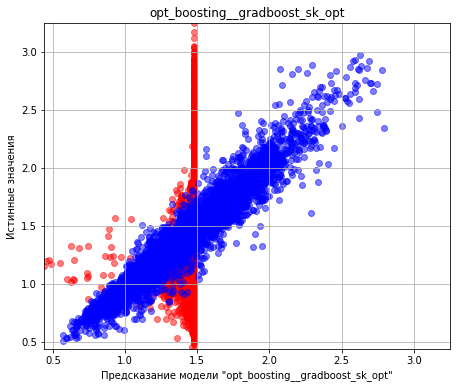

In [110]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'opt_boosting__gradboost_sk_opt' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [111]:
y_test_pred = models_y_test_pred['boosting__gradboost_sk']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))

Стандартный оценщик
R^2 0.7403328078747144
MSE 0.041536142679325254
RMSE 0.20380417728625008
MAE 0.1541922515017558
None


#### Градиентный бустинг из xgboost (Gradient Boosting)

In [112]:
regressor = XGBRegressor(use_label_encoder=False, verbosity=0)
regressor.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 0,
 'use_label_encoder': False}

In [113]:
%%time
parameters = {
    'n_estimators': range(0, 200, 10),
    'max_depth' : list(range(0, 25)),
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
estimator = RandomizedSearchCV(regressor, parameters, cv=3, n_jobs=-1)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(print_metrics(y_test, y_test_pred))

Наилучший оценщик
R^2 0.9141057097829924
MSE 0.01373957743599595
RMSE 0.11721594360835028
MAE 0.08446013255903166
None
Wall time: 1min 32s


Наилучшие параметры
{'subsample': 0.8, 'reg_lambda': 1.3, 'reg_alpha': 1.3, 'n_estimators': 130, 'max_depth': 20, 'colsample_bytree': 0.7}


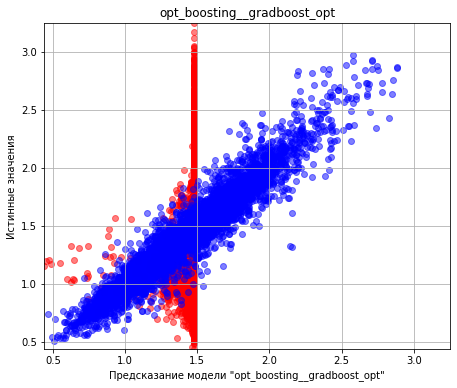

In [114]:
plot_y_vs_y_test_pred(y_train, y_test, y_train_pred, y_test_pred, 'opt_boosting__gradboost_opt' );
print('Наилучшие параметры')
print(estimator.best_params_)

In [115]:
y_test_pred = models_y_test_pred['boosting__gradboost_xg']
print('Стандартный оценщик')
print(print_metrics(y_test, y_test_pred))


Стандартный оценщик
R^2 0.9025924384921821
MSE 0.015581230496310734
RMSE 0.12482479920396722
MAE 0.08980124616862432
None
